# Handwritten letter recognition with machine learning

## Data and preparing it

importing needed libraries (tensorflow and matplotlib)

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from PIL import Image

Dataset used in project is download from http://ai.stanford.edu/~btaskar/ocr/ and converted to csv file type. Dataset contains handwritten words, which have been divided into letters, collected by Rob Kassel at MIT Spoken Language Systems Group.

Data contains fields:

1. id: each letter is assigned a unique integer id
2. letter: a-z
3. next_id: id for next letter in the word, -1 if last letter
4. word_id: each word is assigned a unique integer id (not used)
5. position: position of letter in the word (not used)
6. fold: 0-9 -- cross-validation fold
7. p_i_j: 0/1 -- value of pixel in row i, column j

First convert data to numpy arrays and create dataframe by using pnadas library. The type of integers in array is converted to uint8. 1 is changed to 0 and 0 is changed 255.

In [2]:
with open('letter_data.csv','r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    arrays = []
    letters = []
    for line in csv_reader:
        if line[0].isnumeric():
            letters.append(line[1])
            letter_data = []
            first = 6
            last = 14
            for i in range(16):
                row = []
                help_list = line[first:last]
                
                for number in help_list:
                    if number == '1':
                        row.append(0)
                    elif number == '0':
                        row.append(255)
                
                letter_data.append(row)
                first += 8; last += 8
            letter_array = np.array(letter_data)
            arrays.append(letter_array.astype(np.float32))
        else:
            continue

data ={'letter': letters, 'array': arrays}
df = pd.DataFrame(data)



Let's check arrays.

Letter: m


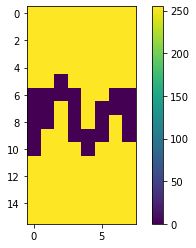

In [3]:
print("Letter:", df.letter[1000])
im = df.array[1000]
for row in im:
    row.astype(np.uint8)
    
plt.figure()
plt.imshow(im)
plt.colorbar()
plt.show()

In [ ]:
labels = df.letter
features = tf.covert_to_tensor(df.array, dtype=tf.float32)

## Model

In [6]:
letter_model = tf.keras.Sequential([
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dense(1)
])

In [7]:
letter_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

In [8]:
letter_model.fit(features, labels, epochs=10)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).